## Observations and Insights 

# Three Observations

### 1. Mouse weight and tumor weight have a very strong correlation when speaking of the Capomulin treatment. This could mean that as the tumor gets smaller in the mouse, the mouse weight is reducing just as fast. 
### 2. Infubinol was the only regimen out of the 4 selected to have an outlier leading me to believe that it should be thrown out of the tests and we should focus on regimens that have more consistent data. This can also be seen in the variance table with Infubinol having the highest variance of the 4.
### 3. Although it was just one mouse at first, the Capomulin seemed to work very well over time to reduce s185's tumor weight. Creating a similar chart for all test subjects using Capomulin may show similar promising results.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_df = pd.merge(mouse_metadata,study_results,on="Mouse ID")



# Display the data table for preview
mouse_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [36]:
# Checking the number of mice.
print(f'The number of mice in this study is {len(mouse_df["Mouse ID"].unique())}')

The number of mice in this study is 249


In [37]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = pd.DataFrame(mouse_df["Mouse ID"].value_counts().reset_index())

dup_mouse=dup_mouse.rename(columns = {'index': 'Mouse ID', 'Mouse ID':'Count'})

dup_mouse = dup_mouse[dup_mouse.Count !=1]

dupes = dup_mouse["Mouse ID"].unique()

dupes

array(['g989', 'o331', 'm650', 'p438', 'w422', 'n364', 'r554', 'u327',
       'b879', 'a444', 'j119', 's565', 'e584', 'h246', 'e476', 'v923',
       'q633', 'p136', 'x401', 'v991', 'q511', 'a897', 'i738', 'u364',
       'y163', 't724', 'b742', 'g296', 'u196', 'k862', 's508', 'l471',
       'c832', 'y260', 'm601', 'w151', 'r604', 'a203', 'x402', 't718',
       'c758', 's710', 'x773', 'm269', 'l897', 'r944', 'c766', 'a401',
       'g570', 'l733', 'i635', 'b559', 't451', 'y478', 'z969', 'j984',
       'j989', 'w575', 'y793', 'e662', 'f545', 'w914', 'o926', 's185',
       'a262', 'a411', 'i334', 'k483', 'i901', 'j913', 'y769', 'q597',
       'a275', 'p189', 'k382', 'x581', 'i557', 'a251', 'j296', 'g288',
       'f345', 't198', 'a492', 'r701', 'a963', 'z578', 'z581', 'c282',
       'a685', 'c264', 'g497', 'j755', 'y865', 'x822', 'g791', 'g316',
       'b128', 'o562', 's337', 'm546', 'r811', 'z795', 'q787', 'm550',
       'l509', 't565', 'a644', 'w350', 'o795', 'a818', 'd251', 'e227',
      

In [38]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_df.sort_values(by="Timepoint")

mice_df = mouse_df.drop_duplicates(subset="Mouse ID",keep="last")

mice_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [39]:
# Checking the number of mice in the clean DataFrame.

print(f'The number of mice in the cleaned data set is {len(mice_df["Mouse ID"].unique())}')


The number of mice in the cleaned data set is 249


## Summary Statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
# This method is the most straighforward, creating multiple series and putting them all together at the end.
drug = mice_df['Drug Regimen'].unique()
drug_mean = []
drug_median = []
drug_var=[]
drug_std=[]
drug_sem=[]

for x in drug:
    drug_df=mice_df.loc[mice_df['Drug Regimen'] == x]
    drug_mean.append(drug_df['Tumor Volume (mm3)'].mean())
    drug_median.append(drug_df['Tumor Volume (mm3)'].median())
    drug_var.append(drug_df['Tumor Volume (mm3)'].var())
    drug_std.append(drug_df['Tumor Volume (mm3)'].std())
    drug_sem.append(drug_df['Tumor Volume (mm3)'].sem())



drug_pd_df=pd.DataFrame({"Drug Regimen":drug,
                         "Mean":drug_mean,
                         "Median":drug_median,
                         "Variance":drug_var,
                         "Standard Deviance":drug_std,
                         "SEM":drug_sem})

drug_pd_df.sort_values(by=["Drug Regimen"])



,Drug Regimen,Mean,Median,Variance,Standard Deviance,SEM
1,Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
4,Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
2,Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
7,Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
9,Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
3,Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
8,Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
0,Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
5,Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056
6,Zoniferol,59.181258,61.840058,76.862027,8.767099,1.753420


In [41]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

stats_table_groupby = mice_df.groupby("Drug Regimen").agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

stats_table_groupby



Tumor Volume (mm3)                                            
                           mean     median         var        std       sem
Drug Regimen                                                               
Capomulin             36.667568  38.125164   32.663378   5.715188  1.143038
Ceftamin              57.753977  59.851956   69.982735   8.365568  1.673114
Infubinol             58.178246  60.165180   74.010875   8.602957  1.720591
Ketapril              62.806191  64.487812   98.921330   9.945920  1.989184
Naftisol              61.205757  63.283288  106.029927  10.297083  2.059417
Placebo               60.508414  62.030594   78.759797   8.874672  1.774934
Propriva              56.736964  55.841410   69.349002   8.327605  1.665521
Ramicane              36.191390  36.561652   32.166354   5.671539  1.134308
Stelasyn              61.001707  62.192350   90.331586   9.504293  1.940056
Zoniferol             59.181258  61.840058   76.862027   8.767099  1.753420

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

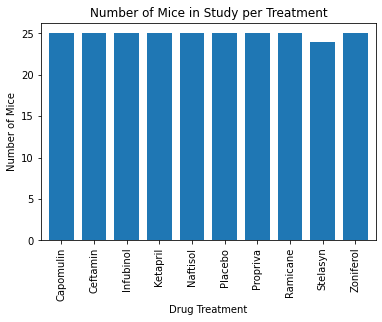

In [42]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_per_drug = (mice_df.groupby("Drug Regimen").agg({'Mouse ID':'count'})).reset_index()
ax = mice_per_drug.plot(kind="bar",x="Drug Regimen",y="Mouse ID",legend=None,width=.75)
plt.title("Number of Mice in Study per Treatment")
plt.xlabel("Drug Treatment")
plt.ylabel("Number of Mice")


Text(0, 0.5, 'Number of Mice')

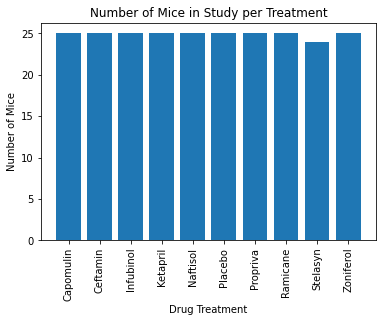

In [43]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mice_per_drug = (mice_df.groupby("Drug Regimen").agg({'Mouse ID':'count'})).reset_index()
x_values = mice_per_drug['Drug Regimen']
y_values = mice_per_drug['Mouse ID']

plt.bar(x_values,y_values)
plt.title("Number of Mice in Study per Treatment")
plt.xticks(rotation=90)
plt.xlabel("Drug Treatment")
plt.ylabel("Number of Mice")


Text(0.5, 1.0, 'Percentage of Mice in Study')

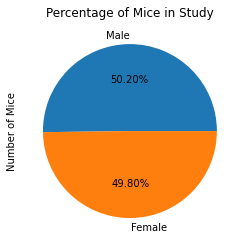

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

female_vs_male = mice_per_drug = pd.DataFrame(mice_df['Sex'].value_counts().reset_index())
female_vs_male=female_vs_male.rename(columns = {'index': 'Sex', 'Sex':'Number of Mice'})
female_vs_male=female_vs_male.set_index("Sex")
female_vs_male.plot.pie(y="Number of Mice",autopct='%.2f%%',legend=None)
plt.title("Percentage of Mice in Study")


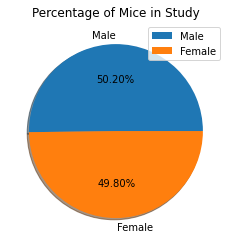

In [45]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels=["Male","Female"]

plt.pie(female_vs_male["Number of Mice"],labels=labels,autopct='%.2f%%',shadow=True)
plt.legend(loc="best")
plt.title("Percentage of Mice in Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [46]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


last_time_per_mouse = mice_df[["Mouse ID","Timepoint"]]

new_mouse_df=pd.merge(last_time_per_mouse,mouse_df,on=["Mouse ID","Timepoint"],how="inner")

new_mouse_df = new_mouse_df.loc[(new_mouse_df["Drug Regimen"]=="Capomulin") | (new_mouse_df["Drug Regimen"]=="Ramicane") | (new_mouse_df["Drug Regimen"]=="Infubinol") | (new_mouse_df["Drug Regimen"]=="Ceftamin")]

new_mouse_df.head()


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,45,Ramicane,Male,21,16,22.050126,1
1,s185,45,Capomulin,Female,3,17,23.343598,1
2,x401,45,Capomulin,Female,16,15,28.484033,0
3,m601,45,Capomulin,Male,22,17,28.430964,1
4,g791,45,Ramicane,Male,11,16,29.128472,1


### I had already sorted the original data by timepoint before removing duplicates but the last so the (# Start by getting the last (greatest) timepoint for each mouse) w

In [21]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

drug_tumor_df = new_mouse_df[["Drug Regimen","Tumor Volume (mm3)"]]
treatments=new_mouse_df['Drug Regimen'].unique()

cap_vol=drug_tumor_df.loc[drug_tumor_df["Drug Regimen"]=='Capomulin'].drop(columns=["Drug Regimen"])
ram_vol=drug_tumor_df.loc[drug_tumor_df["Drug Regimen"]=='Ramicane'].drop(columns=["Drug Regimen"])
inf_vol=drug_tumor_df.loc[drug_tumor_df["Drug Regimen"]=='Infubinol'].drop(columns=["Drug Regimen"])
cef_vol=drug_tumor_df.loc[drug_tumor_df["Drug Regimen"]=='Ceftamin'].drop(columns=["Drug Regimen"])

cap_quartiles=cap_vol["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
ram_quartiles=ram_vol["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
inf_quartiles=inf_vol["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])
cef_quartiles=cef_vol["Tumor Volume (mm3)"].quantile([0.25,0.5,0.75])

cap_iql =cap_quartiles[0.75]-cap_quartiles[0.25]
ram_iql =ram_quartiles[0.75]-ram_quartiles[0.25]
inf_iql =inf_quartiles[0.75]-inf_quartiles[0.25]
cef_iql =cef_quartiles[0.75]-cef_quartiles[0.25]

cap_upper_bound = cap_quartiles[0.75] + (1.5*cap_iql)
cap_lower_bound = cap_quartiles[0.25] - (1.5*cap_iql)
ram_upper_bound = ram_quartiles[0.75] + (1.5*ram_iql)
ram_lower_bound = ram_quartiles[0.25] - (1.5*ram_iql)
inf_upper_bound = inf_quartiles[0.75] + (1.5*inf_iql)
inf_lower_bound = inf_quartiles[0.25] - (1.5*inf_iql)
cef_upper_bound = cef_quartiles[0.75] + (1.5*cef_iql)
cef_lower_bound = cef_quartiles[0.25] - (1.5*cef_iql)

cap_outliers = cap_vol.loc[(cap_vol["Tumor Volume (mm3)"]<cap_lower_bound) | (cap_vol["Tumor Volume (mm3)"]>cap_upper_bound)]
ram_outliers = ram_vol.loc[(ram_vol["Tumor Volume (mm3)"]<ram_lower_bound) | (ram_vol["Tumor Volume (mm3)"]>ram_upper_bound)]
inf_outliers = inf_vol.loc[(inf_vol["Tumor Volume (mm3)"]<inf_lower_bound) | (inf_vol["Tumor Volume (mm3)"]>inf_upper_bound)]
cef_outliers = cef_vol.loc[(cef_vol["Tumor Volume (mm3)"]<cef_lower_bound) | (cef_vol["Tumor Volume (mm3)"]>cef_upper_bound)]
cap_outliers=cap_outliers.values.tolist()
ram_outliers=ram_outliers.values.tolist()
inf_outliers=inf_outliers.values.tolist()
cef_outliers=cef_outliers.values.tolist()

print(f'The IQR for Capomulin is {round(cap_iql,2)} and there are {len(cap_outliers)} potential outliers. They are {cap_outliers}')   
print(f'The IQR for Ramicane is {round(ram_iql,2)} and there are {len(ram_outliers)} potential outliers. They are {ram_outliers}')
print(f'The IQR for Infubinol is {round(inf_iql,2)} and there are {len(inf_outliers)} potential outliers. They are {inf_outliers}')
print(f'The IQR for Ceftamin is {round(cef_iql,2)} and there are {len(cef_outliers)} potential outliers. They are {cef_outliers}')


    
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

The IQR for Capomulin is 7.78 and there are 0 potential outliers. They are []
The IQR for Ramicane is 9.1 and there are 0 potential outliers. They are []
The IQR for Infubinol is 11.48 and there are 1 potential outliers. They are [[36.321345799999996]]
The IQR for Ceftamin is 15.58 and there are 0 potential outliers. They are []


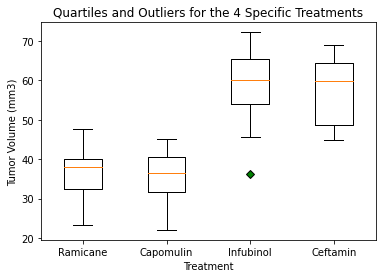

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

data=[cap_vol["Tumor Volume (mm3)"],ram_vol["Tumor Volume (mm3)"],inf_vol["Tumor Volume (mm3)"],cef_vol["Tumor Volume (mm3)"]]
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()
ax1.set_title('Quartiles and Outliers for the 4 Specific Treatments')
ax1.boxplot(data,flierprops=green_diamond,labels=treatments)
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume (mm3)")

plt.show()



## Seaborn looks way better though

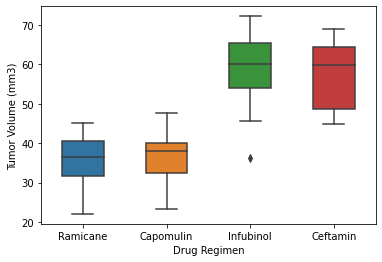

In [23]:


drug_tumor_plot = sns.boxplot(y="Tumor Volume (mm3)",x="Drug Regimen",data=drug_tumor_df,width=0.5)



## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

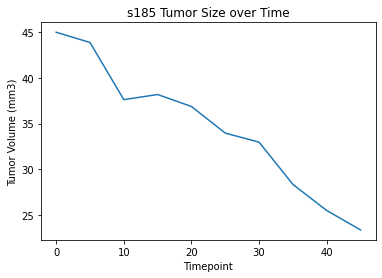

In [24]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185=mouse_df.loc[mouse_df['Mouse ID'] == 's185']

x_values = s185["Timepoint"]
y_values = s185["Tumor Volume (mm3)"]

plt.plot(x_values,y_values)
plt.title("s185 Tumor Size over Time")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")



Text(0, 0.5, 'Average Tumor Volume (mm3)')

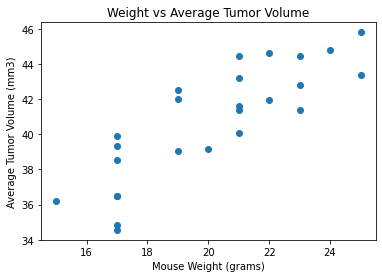

In [25]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_df=mouse_df.loc[mouse_df['Drug Regimen'] == 'Capomulin']

avg_cap_tumor = capomulin_df.groupby("Mouse ID").agg({"Tumor Volume (mm3)":'mean',"Weight (g)":'min'})

plt.scatter(avg_cap_tumor["Weight (g)"],avg_cap_tumor["Tumor Volume (mm3)"])
plt.title("Weight vs Average Tumor Volume")
plt.xlabel("Mouse Weight (grams)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

The corrleation coefficient is 0.84 meaning there is a strong correlation.
The Linear Regress model for this is y=0.95x + 21.55


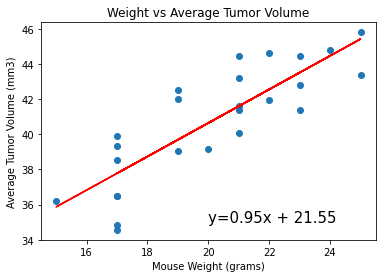

In [26]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slope,intercept,rvalue,pvalue,stderr)=st.linregress(avg_cap_tumor["Weight (g)"],avg_cap_tumor["Tumor Volume (mm3)"])

regress_values = slope*avg_cap_tumor["Weight (g)"]+intercept

line_eq = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(avg_cap_tumor["Weight (g)"],avg_cap_tumor["Tumor Volume (mm3)"])
plt.title("Weight vs Average Tumor Volume")
plt.xlabel("Mouse Weight (grams)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(avg_cap_tumor["Weight (g)"],regress_values,"r")
plt.annotate(line_eq,(20,35),fontsize=15)

print(f'The corrleation coefficient is {round(rvalue,2)} meaning there is a strong correlation.')
print(f'The Linear Regress model for this is {line_eq}')